In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import optimizers
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from keras import regularizers
from glob import glob
import librosa.display
import librosa

In [21]:
# import competition dataset
x_train = np.load('train_data.npy')
y_train = pd.read_csv('train_labels.csv')
x_test = np.load('test_data.npy')

# Normalization 
normalizer = Normalizer().fit(x_train)
x_train = normalizer.transform(x_train)
x_test=normalizer.transform(x_test)

y_train = np.array(y_train)
y_train = y_train[:,1]


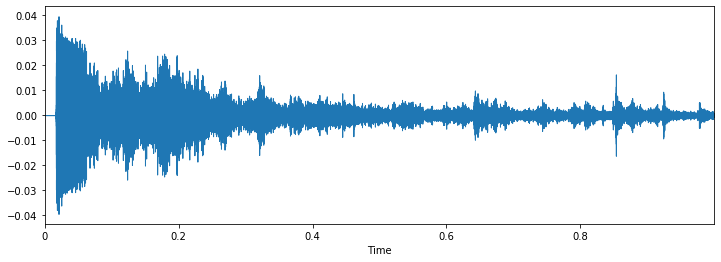

In [22]:
# wave plot
plt.figure(figsize=(12,4))
librosa.display.waveplot(x_train[0],sr=44100)

In [23]:
# Create Spectogram for x_train

array = []
for i in range(len(x_train)):
    sr = 14100  # sample_rate
    D = np.abs(librosa.stft(x_train[i]))**2
    S = librosa.feature.melspectrogram(S=D, sr=sr,n_fft=256,n_mels=128)
    S = S.reshape(-1,128,87,1)
    array.append(S)
x_train = np.vstack(array)
x_train = x_train.reshape(-1,128,87,1)
#print("x_train.shape:",x_train.shape)
#print(x_train)

# create spectrogram imgaes, may leave it here for future use
#     fig=plt.figure(figsize=(12,4))
#     librosa.display.specshow(librosa.amplitude_to_db(S))
#     plt.set_cmap('hot')
#     #plt.title('Power spectrogram')
#     #plt.colorbar(format='%+2.0f dB')
#     #plt.tight_layout()
#     #plt.axis('off')
#     fig.savefig(r"C:\Users\admin\Desktop\Spectrograms\{}.png".format(i),bbox_inches='tight', dpi=300)
#     plt.close(fig)

[[[[7.97087996e-05]
   [6.51892554e-03]
   [2.31801663e-02]
   ...
   [1.38435405e-06]
   [1.32607533e-06]
   [3.09256689e-06]]

  [[2.49310047e-04]
   [2.92168465e-03]
   [6.71983464e-03]
   ...
   [1.28163549e-06]
   [3.88819853e-06]
   [6.04179741e-06]]

  [[5.46939671e-04]
   [9.98962577e-03]
   [2.32100617e-02]
   ...
   [7.83541418e-06]
   [6.27473082e-06]
   [6.49370577e-06]]

  ...

  [[2.00130271e-05]
   [8.81407526e-04]
   [2.80472450e-03]
   ...
   [1.19374454e-05]
   [9.67130472e-06]
   [4.49488925e-06]]

  [[4.29294278e-06]
   [2.66230199e-04]
   [6.87086897e-04]
   ...
   [4.42967848e-06]
   [2.62231470e-06]
   [3.76079754e-07]]

  [[1.33630138e-07]
   [1.51791301e-05]
   [5.02191724e-05]
   ...
   [2.13323105e-07]
   [1.52186686e-07]
   [6.34977582e-08]]]


 [[[1.43078670e-01]
   [1.16928138e-01]
   [4.87904288e-02]
   ...
   [4.43696976e-02]
   [6.33206666e-02]
   [1.46653116e-01]]

  [[3.11507761e-01]
   [2.33452514e-01]
   [1.06865019e-01]
   ...
   [9.35931355e-02]
 

In [24]:
# Create Spectogram for x_test

arrayTest = []
for i in range(len(x_test)):
    Dtest = np.abs(librosa.stft(x_test[i]))**2
    Stest = librosa.feature.melspectrogram(S=Dtest, sr=sr,n_fft=256,n_mels=128)
    Stest = Stest.reshape(-1,128,87,1)
    arrayTest.append(Stest)
x_test = np.vstack(arrayTest)
x_test = x_test.reshape(-1,128,87,1)
print("x_test.shape:",x_test.shape)

x_test.shape: (3997, 128, 87, 1)


In [26]:
# model output a 2 dim vector indication class
y_train = np_utils.to_categorical(y_train,2)

In [36]:
# create 2-D convolution neural network

model = Sequential()

model.add(Conv2D(32, kernel_size=(5,5),
                 activation='relu',
                 input_shape=(128,87,1)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 124, 83, 32)       832       
_________________________________________________________________
dropout_5 (Dropout)          (None, 124, 83, 32)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 120, 79, 64)       51264     
_________________________________________________________________
dropout_6 (Dropout)          (None, 120, 79, 64)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 116, 75, 64)       102464    
_________________________________________________________________
dropout_7 (Dropout)          (None, 116, 75, 64)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 556800)            0         
__________

In [38]:
# compile model
adam = optimizers.Adam(lr=.0001) 
model.compile(loss='binary_crossentropy', 
              optimizer=adam,
              metrics=['accuracy'])

In [39]:
#x_train = x_train.reshape(-1,128,87,1)
print("x_train.shape:",x_train.shape)

#x_test = x_test.reshape(-1,128,87,1)
print("x_test.shape:",x_test.shape)

x_train.shape: (3999, 128, 87, 1)
x_test.shape: (3997, 128, 87, 1)


In [40]:
from keras.callbacks import EarlyStopping
EarlyStopping = EarlyStopping(monitor='val_loss',patience=10,verbose=0,mode='auto')
model.fit(x_train, y_train, batch_size=32, epochs=30, validation_split=0.1, callbacks=[EarlyStopping])

Train on 3599 samples, validate on 400 samples
Epoch 1/30
3599/3599 [==============================] - 1140s 317ms/step - loss: 0.2806 - acc: 0.8915 - val_loss: 0.1905 - val_acc: 0.9125
Epoch 2/30
3599/3599 [==============================] - 786s 218ms/step - loss: 0.1753 - acc: 0.9314 - val_loss: 0.1240 - val_acc: 0.9513
Epoch 3/30
3599/3599 [==============================] - 585s 163ms/step - loss: 0.1259 - acc: 0.9557 - val_loss: 0.1032 - val_acc: 0.9575
Epoch 4/30
3599/3599 [==============================] - 565s 157ms/step - loss: 0.1038 - acc: 0.9621 - val_loss: 0.1062 - val_acc: 0.9550
Epoch 5/30
3599/3599 [==============================] - 563s 156ms/step - loss: 0.0849 - acc: 0.9678 - val_loss: 0.1036 - val_acc: 0.9575
Epoch 6/30
3599/3599 [==============================] - 568s 158ms/step - loss: 0.0782 - acc: 0.9728 - val_loss: 0.1021 - val_acc: 0.9525
Epoch 7/30
3599/3599 [==============================] - 568s 158ms/step - loss: 0.0688 - acc: 0.9755 - val_loss: 0.0978 - va

In [18]:
# make prediction
y_predict = model.predict_classes(x_test)
print(y_predict[:500])


[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [20]:
# save the prediction to csv
prediction = pd.DataFrame(y_predict,columns=['label']).to_csv('submission_Spect&2dCNN_2')

In [ ]:
TrainingNotes:
# loss: 0.0303 - acc: 0.9889 - val_loss: 0.0766 - val_acc: 0.9675
# adding a conv layers64 // loss: 0.0151 - acc: 0.9958 - val_loss: 0.1859 - val_acc: 0.9650
** remove all maxpooling and add dropout(0.25)// loss: 0.0252 - acc: 0.9904 - val_loss: 0.1322 - val_acc: 0.9688